In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

####LinearDiscriminantAnalysis, using *numpy*

In [3]:
cov = np.cov(iris_scaled)

In [4]:
print(iris.target_names)
print(type(iris.target))

['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'>


In [5]:
target_count = [0]*len(iris.target_names)
print(target_count)
for i in range(len(target_count)):
  target_count[i] = (iris.target == i).sum()
print(target_count)

[0, 0, 0]
[50, 50, 50]


In [6]:
# Sw
Ss = [0] * len(iris.target_names)
for i in range(len(target_count)):
  target_iris_scaled = iris_scaled[iris.target == i]
  mu_i = np.mean(target_iris_scaled, axis=0)
  Ss[i] = (target_iris_scaled - mu_i)
  Ss[i] = np.dot(Ss[i].T, Ss[i])
Ss = np.array(Ss)
Sw = np.sum(Ss, axis=0)
print(Sw)

[[57.19414039 38.01741201 16.95864185  9.00354437]
 [38.01741201 89.88257294 10.62508571 14.57007861]
 [16.95864185 10.62508571  8.79424214  4.69233162]
 [ 9.00354437 14.57007861  4.69233162 10.66756048]]


In [7]:
# Sb
N = iris.data.shape[0]
mu = np.mean(iris_scaled, axis=0).reshape(-1, 1)

Sb = [0] * len(target_count)
for i in range(len(target_count)):
  N_i = target_count[i]
  target_iris_scaled = iris_scaled[iris.target == i]
  mu_i = np.mean(target_iris_scaled, axis=0).reshape(-1, 1)
  Sb[i] = N_i * np.dot((mu_i - mu), (mu_i - mu).T)
Sb = np.array(Sb)
print(Sb)
Sb = np.sum(Sb, axis=0)
print(Sb)

[[[ 51.46852417 -43.2851185   66.20063455  63.65942715]
  [-43.2851185   36.40286008 -55.674849   -53.53768915]
  [ 66.20063455 -55.674849    85.14959552  81.88100476]
  [ 63.65942715 -53.53768915  81.88100476  78.73788359]]

 [[  0.63036492  -3.71335312   1.60184005   0.9360638 ]
  [ -3.71335312  21.87461729  -9.43611793  -5.51416381]
  [  1.60184005  -9.43611793   4.07048591   2.37866104]
  [  0.9360638   -5.51416381   2.37866104   1.39001301]]

 [[ 40.70697052  -8.65440801  46.00194993  49.09213362]
  [ -8.65440801   1.83994969  -9.78013443 -10.43711553]
  [ 46.00194993  -9.78013443  51.98567642  55.47781729]
  [ 49.09213362 -10.43711553  55.47781729  59.20454292]]]
[[ 92.80585961 -55.65287963 113.80442453 113.68762457]
 [-55.65287963  60.11742706 -74.89110136 -69.48896849]
 [113.80442453 -74.89110136 141.20575786 139.73748309]
 [113.68762457 -69.48896849 139.73748309 139.33243952]]


In [8]:
print(Sw.shape)
print(Sb.shape)

(4, 4)
(4, 4)


In [9]:
invSw = np.linalg.inv(Sw)
invSw_dot_Sb = np.dot(invSw, Sb)
eigenvalues, eigenvectors = np.linalg.eig(invSw_dot_Sb)

In [10]:
print(eigenvectors)
print(eigenvalues)

[[ 0.15128777  0.00693578 -0.47750757 -0.43630448]
 [ 0.14733266  0.32786115 -0.06490476  0.18220612]
 [-0.85598541 -0.57170517 -0.41387094  0.80434678]
 [-0.47190474  0.75207191  0.77232424 -0.35981326]]
[ 3.21919292e+01  2.85391043e-01 -2.16244864e-19  6.31373037e-15]


In [11]:
iris_lda = (eigenvectors[:, :2].T.dot(iris_scaled.T)).T
print(iris_lda.shape)
print(iris_lda[:5])

(150, 2)
[[ 1.78184932  0.10475073]
 [ 1.57560938 -0.27429294]
 [ 1.65542996 -0.09253433]
 [ 1.50587922 -0.2338358 ]
 [ 1.7974336   0.17938292]]


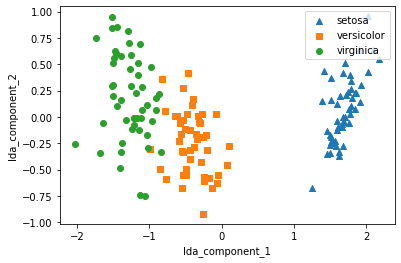

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend(loc="upper right")
plt.xlabel(lda_columns[0])
plt.ylabel(lda_columns[1])
plt.show()

####LinearDiscriminantAnalysis, using sklearn

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [14]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)
print(iris_lda[:5])

(150, 2)
[[ 8.06179978  0.30042062]
 [ 7.12868772 -0.78666043]
 [ 7.48982797 -0.26538449]
 [ 6.81320057 -0.67063107]
 [ 8.13230933  0.51446253]]


####plot Data

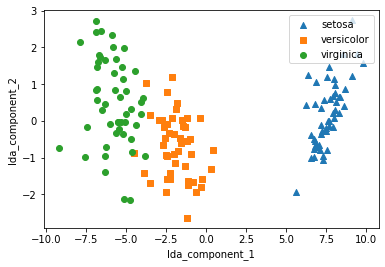

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend(loc="upper right")
plt.xlabel(lda_columns[0])
plt.ylabel(lda_columns[1])
plt.show()